In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from ch07_autograd.utils import Scalar, draw_graph

In [2]:
def scalar_sum(nums):
    """
    为了作图美观，定义基于Scalar的求和运算
    """
    value = 0.0
    requires_grad = False
    wrt = {}
    for item in nums:
        value += item.value
        wrt[item] = 1.0
        requires_grad = requires_grad or item.requires_grad
    output = Scalar(value, nums, 'sum')
    output.requires_grad=requires_grad
    output.grad_wrt = wrt
    return output

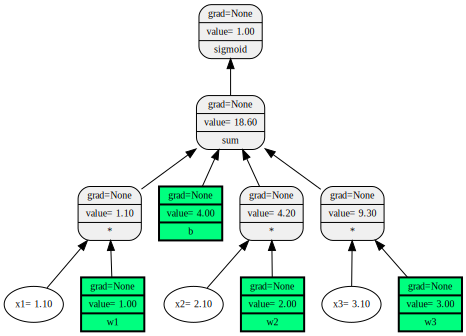

In [3]:
w1 = Scalar(1.0, label='w1')
w2 = Scalar(2.0, label='w2')
w3 = Scalar(3.0, label='w3')
b = Scalar(4.0, label='b')
x1 = Scalar(1.1, label='x1', requires_grad=False)
x2 = Scalar(2.1, label='x2', requires_grad=False)
x3 = Scalar(3.1, label='x3', requires_grad=False)
h = scalar_sum([w1 * x1, w2 * x2, w3 * x3, b])
y = h.sigmoid()
draw_graph(y)